 ### Import Packages

In [1]:
import pandas
import matplotlib.pyplot as plt
%matplotlib inline
pandas.options.display.mpl_style = 'default'

import seaborn as sns

from ipywidgets import interact

### Import Data

In [3]:
def hdma_init():
    institution_data= pandas.read_csv('/home/shubhamjain/devel/contifydeploy/contify-banking/notebooks/data-challenge-data-master/2012_to_2014_institutions_data.csv')
    loans_data= pandas.read_csv('/home/shubhamjain/devel/contifydeploy/contify-banking/notebooks/data-challenge-data-master/2012_to_2014_loans_data.csv')
    merged = pandas.merge(loans_data, institution_data, how='outer', on=['As_of_Year', 'Respondent_ID', 'Agency_Code'])
    return merged


In [2]:
def hmda_to_json(data, states=None, conventional_conforming=None):
    if not states:
        states = data['State'].unique()
    if not conventional_conforming:
        conventional_conforming = ['Y', 'N']
    out_data = data.loc[(data[u'Conventional_Conforming_Flag'].isin(conventional_conforming)) & data['State'].isin(states)]
    with open('state_product_wize.json', 'w') as f:
        f.write(out_data.to_json(orient='index'))      


In [17]:
data = hdma_init()
hmda_to_json(data, states=['WV'], conventional_conforming=['Y'])


#hmda_to_json(merged)

### Lender Count


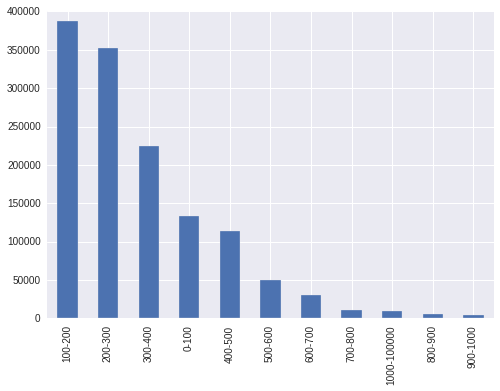

In [152]:
def loan_bracket(row):
    if row['Loan_Amount_000'] < 100:
        return '0-100'
    elif row['Loan_Amount_000'] < 200:
        return '100-200'
    elif row['Loan_Amount_000'] < 300:
        return '200-300'
    elif row['Loan_Amount_000'] < 400:
        return '300-400'
    elif row['Loan_Amount_000'] < 500:
        return '400-500'
    elif row['Loan_Amount_000'] < 600:
        return '500-600'
    elif row['Loan_Amount_000'] < 700:
        return '600-700'
    elif row['Loan_Amount_000'] < 800:
        return '700-800'
    elif row['Loan_Amount_000'] < 900:
        return '800-900'
    elif row['Loan_Amount_000'] < 1000:
        return '900-1000'
    elif row['Loan_Amount_000'] < 100000:
        return '1000-100000'
    else:
        return None

data['loan_bracket'] = data.apply(lambda row: loan_bracket(row), axis=1)

data['loan_bracket'].dropna().value_counts().plot(kind='bar')

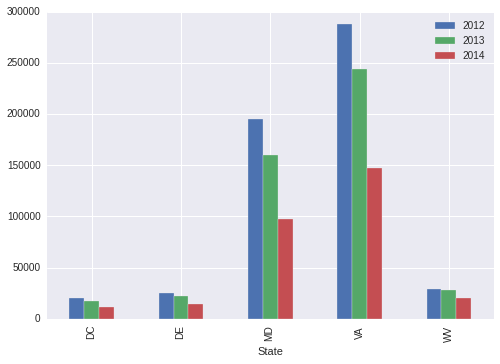

In [16]:

statewize = data[['State', 'Loan_Amount_000', 'As_of_Year']]
statewize_grouped = statewize.groupby('State').State.agg(['count'])
for year in [2012, 2013, 2014]:
    statewize_grouped[year] = statewize[statewize.As_of_Year == year].groupby('State').State.agg(['count'])
statewize_grouped.drop(statewize_grouped.columns[[0]], axis=1).plot(kind='bar')


    

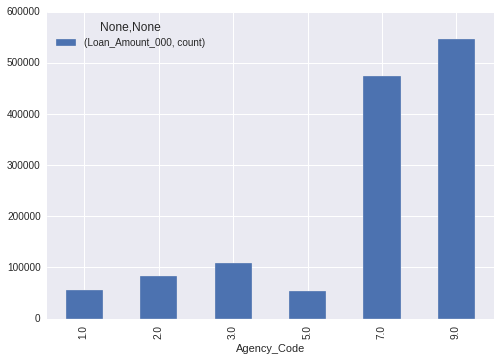

In [74]:
agencywize = data[['Agency_Code', 'Loan_Amount_000']]
agencywize_grouped = agencywize.groupby('Agency_Code').agg(['count'])
agencywize_grouped.plot(kind='bar')


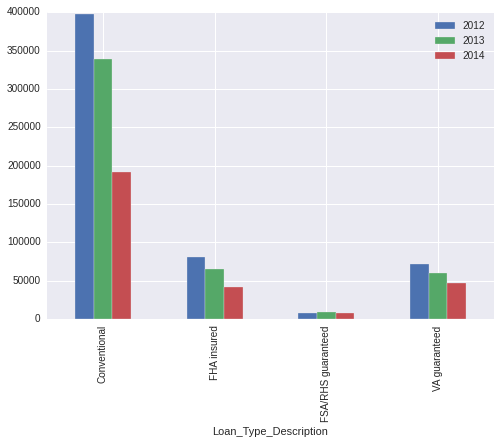

In [254]:
loan_type_wize = data[['Loan_Type_Description', 'Loan_Amount_000', 'As_of_Year']]
for year in [2012, 2013, 2014]:
    loan_type_wize_grouped[year] = loan_type_wize[loan_type_wize.As_of_Year == year].groupby('Loan_Type_Description').Loan_Type_Description.agg(['count'])
loan_type_wize_grouped.drop(loan_type_wize_grouped.columns[[0]], axis=1).plot(kind='bar')


In [265]:
respondantwize = data[['Respondent_Name_TS', 'Loan_Amount_000']]
respondantwize_grouped = respondantwize.dropna().groupby('Respondent_Name_TS').agg(['count'])
respondantwize_grouped_col = respondantwize_grouped['Loan_Amount_000']['count'].copy()
respondantwize_grouped_col.sort(ascending=False)
print respondantwize_grouped_col[:25]

Respondent_Name_TS
WELLS FARGO BANK, NA              119016
QUICKEN LOANS                      66561
SUNTRUST MORTGAGE, INC             46798
BRANCH BANKING AND TRUST CO        40816
BANK OF AMERICA, N.A.              39021
JPMORGAN CHASE BANK, NA            36185
GEORGE MASON MORTGAGE LLC          29021
NFCU                               24399
FIRST HOME MORTGAGE                23239
PNC BANK N.A.                      22346
CITIBANK, N.A.                     19795
MONARCH BANK                       15100
USAA FEDERAL SAVINGS BANK          14241
EMBRACE HOME LOANS, INC.           14218
FIRST SAVINGS MORTGAGE CORPORA     13985
PROSPERITY MORTGAGE COMPANY        13102
FIFTH THIRD MORTGAGE COMPANY       11945
FLAGSTAR BANK                      11819
PRIMELENDING                       11410
1ST MARINER BANK                   11113
FREEDOM MORTGAGE CORPORATION       11058
NVR MORTGAGE FINANCE INC           10703
TOWNEBANK                          10370
MCLEAN MORTGAGE CORPORATION        101

/home/shubhamjain/.pyenv/versions/banking/lib/python2.7/site-packages/IPython/kernel/__main__.py:4: FutureWarning: sort is deprecated, use sort_values(inplace=True) for for INPLACE sorting


### Lender Count
